In [173]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [168]:
plt.rc('font', family = 'serif')
plt.style.use('fivethirtyeight')

In [177]:
def binom_graph(n,prob,k):
    
    x = np.arange(0,n+1)
    
    scalar = np.linspace(0,n+1,100)
    
    graph = [binom.pmf(_,n,prob) for _ in scalar]
    probs = [binom.pmf(_,n,prob) for _ in x]
    
    colors = ['blue' if _ == k else 'gray' for _ in x]

    fig,ax = plt.subplots(figsize = (10,5))
    
    ax.plot(scalar,graph, alpha = 0.3)
    ax.scatter(x,probs,c = colors)
    ax.set_yticklabels([str(int(_ * 100)) + '%' for _ in ax.get_yticks()])
    ax.set_xticks(x)
    ax.set_title('')
    
    ax.plot([k,k],[0,probs[k]], c = 'k', ls = '--', lw = 0.5)
    ax.plot([-0.1,k],[probs[k],probs[k]], c = 'k', ls = '--', lw = 0.5)
    ax.set_xlim([-0.1,n])
    
    under_prob = binom.cdf(k,n,prob)
    over_prob = 1 - under_prob
    
    x1 = np.linspace(0,k,100)
    y1 = [binom.pmf(_,n,prob) for _ in x1]
    
    x2 = np.linspace(k,n+1,100)
    y2 = [binom.pmf(_,n,prob) for _ in x2]
    
    ax.fill_between(x1,y1, alpha = 0.3, color = 'gray',
                    label = f'{int(under_prob * 100)}%')
    ax.fill_between(x2,y2, alpha = 0.3, color = 'pink',
                    label = f'{int(over_prob * 100)}%')
    
    k_coord = (x[k],probs[k])
    
    ax.text(k_coord[0],k_coord[1]+0.01,f'{int(probs[k] * 100)}%')
    
    ax.legend(loc = 'upper right')
    
    return fig,ax

C:\Users\whileduck\AppData\Local\Temp\ipykernel_25280\2546406087.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(_ * 100)) + '%' for _ in ax.get_yticks()])


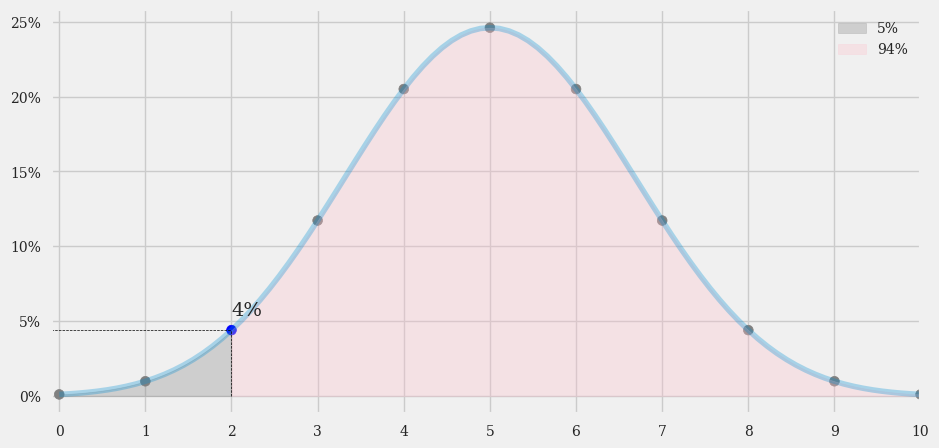

In [178]:
_ = binom_graph(10,0.5,2)